## General Imports

In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
# filter sklearn warning about all same label when playing with dataset structure
from sklearn.exceptions import UndefinedMetricWarning
import warnings
warnings.filterwarnings('ignore', category=UndefinedMetricWarning) 

## Load Data, Split Train-Val, and Train Model

For the purpose of this examples we'll use the simple iris dataset and train a random forest model for multiclass classification

In [3]:
iris_df = load_iris(return_X_y=False, as_frame=True)['frame']
label_col = 'target'
df_train, df_test = train_test_split(iris_df, stratify=iris_df[label_col], random_state=0)

In [4]:
rf_clf = RandomForestClassifier()
rf_clf.fit(df_train.drop(label_col, axis=1), df_train[label_col]);

## Define Deepchecks Dataset

In [5]:
from deepchecks import Dataset

Initialize the Dataset object, stating the relevant metadata about the dataset (e.g. the name for the label column) <br>
Check out the Dataset's attributes to see which additional special columns can be declared and used (e.g. date column, index column).

In [6]:
# We explicitly state that this dataset has no categorical features, otherwise they will be automatically inferred

ds_train = Dataset(df_train, label=label_col, cat_features=[])
ds_test =  Dataset(df_test,  label=label_col, cat_features=[])

## Run Overall Check Suite

Use the OverallCheckSuite that has all checks

In [7]:
from deepchecks.suites import overall_check_suite

In [8]:
OverallSuite = overall_check_suite()

Overall Suite 
 The suite is composed of various checks such as: Train Test Drift, Trust Score Comparison, Index Train Test Leakage, etc... 
 Each check may contain conditions (which results in 
 ✓ /
 ✖ /
 ! 
 ), as well as other outputs such as plots or tables. 
 Suites, checks and conditions can all be modified (see tutorial [link]). 
 Conditions Summary

Status,Check,Condition,More Info
✖,Single Feature Contribution - Train Dataset,Features PPS is not greater than 0.8,"Features with greater PPS: petal width (cm), petal length (cm)"
✖,Single Feature Contribution - Test Dataset,Features PPS is not greater than 0.8,"Features with greater PPS: petal length (cm), petal width (cm)"
✓,Train Test Drift,PSI and Earth Mover's Distance cannot be greater than 0.2 and 0.1 respectively,
✓,Category Mismatch Train Test,Number of new category values is not greater than 0 for all columns,
✓,String Mismatch Comparison,No new variants allowed in test data for all columns,
✓,Label Ambiguity - Test Dataset,Ambiguous sample ratio is not greater than 0%,
✓,Label Ambiguity - Train Dataset,Ambiguous sample ratio is not greater than 0%,
✓,Special Characters - Test Dataset,Ratio of entirely special character samples not greater than 0.10% for all columns,
✓,Special Characters - Train Dataset,Ratio of entirely special character samples not greater than 0.10% for all columns,
✓,String Length Out Of Bounds - Test Dataset,Ratio of outliers not greater than 0% string length outliers for all columns,


Additional Outputs

Train Test Drift

Calculate drift between train dataset and test dataset.

The Drift score is a measure for the difference between two distributions, in this check - the test
 and train distributions. The check shows the drift score and distributions for the features, sorted by
 feature importance and showing only the top 5 features, according to feature importance. 
 If available, the plot titles also show the feature importance (FI) rank.

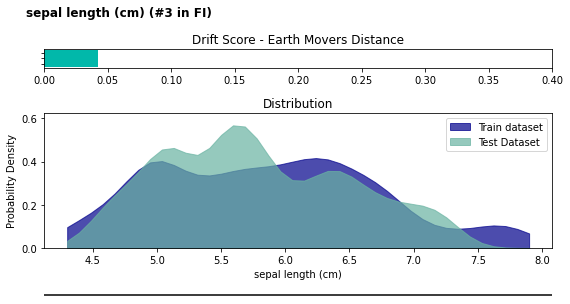

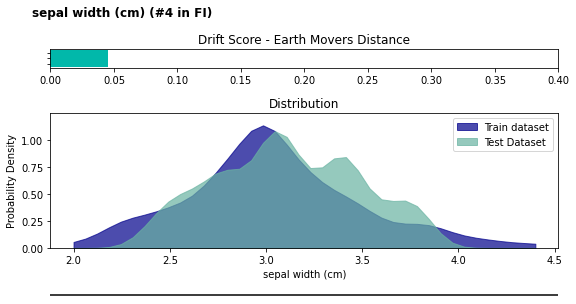

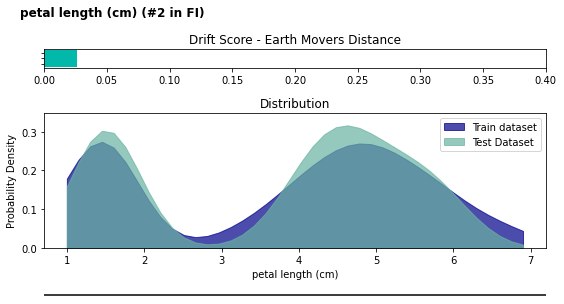

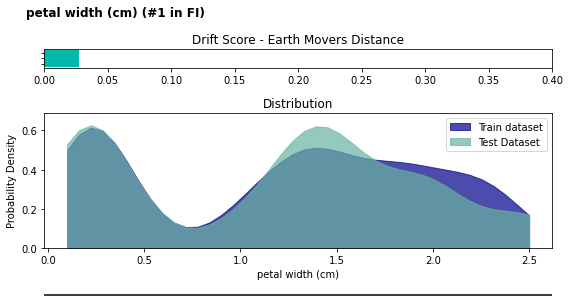

Train Test Samples Mix

Detect samples in the test data that appear also in training data.

2.63% (1.0 / 38) of test data samples appear in train data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
Test indices: 142,5.80,2.70,5.10,1.90,2
Train indices: 101,5.80,2.70,5.10,1.90,2


Single Feature Contribution - Train Dataset

Return the PPS (Predictive Power Score) of all features in relation to the label.

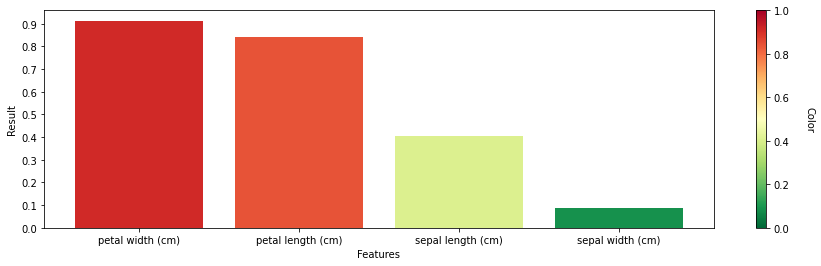

The PPS represents the ability of a feature to single-handedly predict another feature or label.

A high PPS (close to 1) can mean that this feature's success in predicting the label is actually due to data

leakage - meaning that the feature holds information that is based on the label to begin with.

Single Feature Contribution - Test Dataset

Return the PPS (Predictive Power Score) of all features in relation to the label.

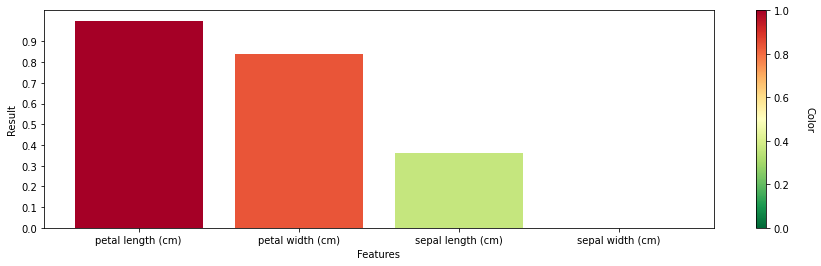

The PPS represents the ability of a feature to single-handedly predict another feature or label.

A high PPS (close to 1) can mean that this feature's success in predicting the label is actually due to data

leakage - meaning that the feature holds information that is based on the label to begin with.

Single Feature Contribution Train-Test

Return the difference in PPS (Predictive Power Score) of all features between train and test datasets.

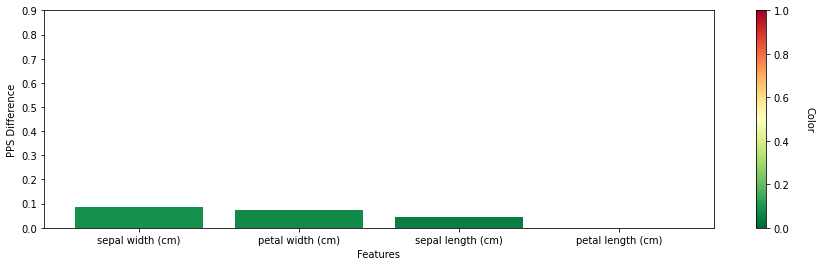

The PPS represents the ability of a feature to single-handedly predict another feature or label.

A high PPS (close to 1) can mean that this feature's success in predicting the label is actually due to data

leakage - meaning that the feature holds information that is based on the label to begin with.

When we compare train PPS to test PPS, A high difference can strongly indicate leakage, as a feature

that was powerful in train but not in test can be explained by leakage in train that is not relevant to a new dataset.

Train-Test Difference Overfit

Visualize overfit by displaying the difference between model metrics on train and on test data.

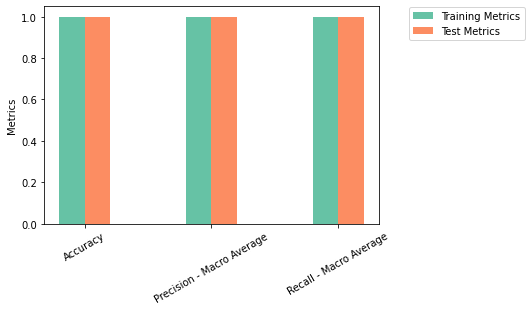

Unused Features

Detect features that are nearly unused by the model.

Features above the line are a sample of the most important features, while the features below the line are the unused features with highest variance, as defined by check parameters

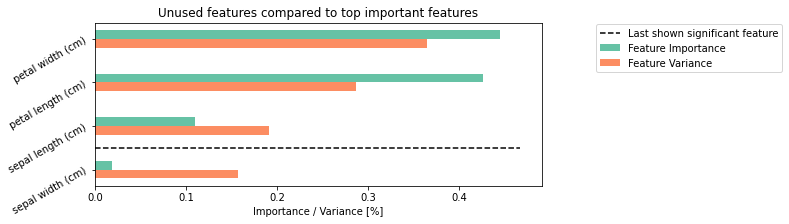

Performance Report - Train Dataset

Summarize given metrics on a dataset and model.

,Score
Metric,
Accuracy,1.00
Precision - Macro Average,1.00
Recall - Macro Average,1.00


Performance Report - Test Dataset

Summarize given metrics on a dataset and model.

,Score
Metric,
Accuracy,1.00
Precision - Macro Average,1.00
Recall - Macro Average,1.00


Naive Model Comparison

Compare naive model score to given model score.

The given model performs 2.92 times compared to the naive model using the Accuracy metric. RandomForestClassifier model prediction has achieved a score of 1 compared to Naive statistical prediction which achieved a score of 0.34 on tested data.

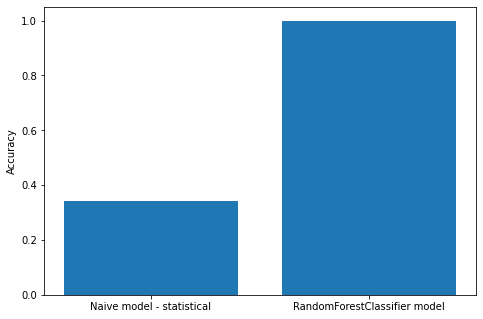

Confusion Matrix Report - Train Dataset

Calculate the confusion matrix of the model on the given dataset.

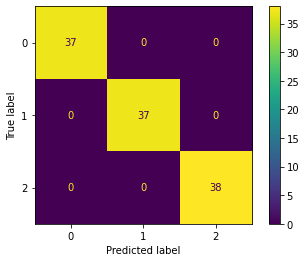

Confusion Matrix Report - Test Dataset

Calculate the confusion matrix of the model on the given dataset.

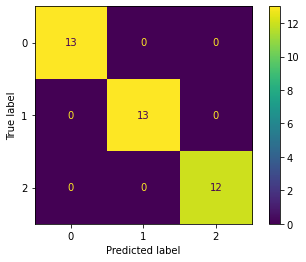

ROC Report - Train Dataset

Calculate the AUC (Area Under Curve) for each class.

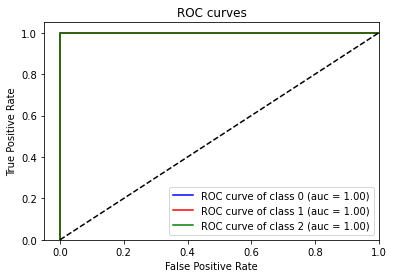

ROC Report - Test Dataset

Calculate the AUC (Area Under Curve) for each class.

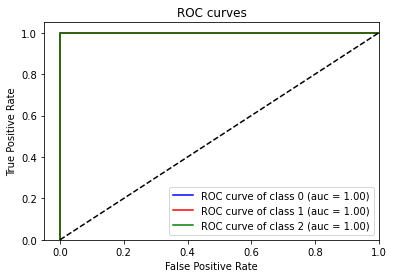

Calibration Metric - Train Dataset

Calculate the calibration curve with brier score for each class.

Calibration curves (also known as reliability diagrams) compare how well the probabilistic predictions of a binary classifier are calibrated. It plots the true frequency of the positive label against its predicted probability, for binned predictions.

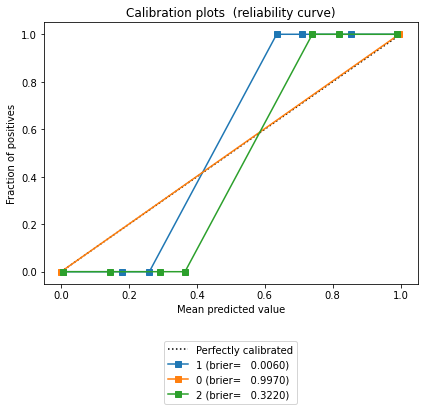

The Brier score metric may be used to assess how well a classifier is calibrated. For more info, please visit https://en.wikipedia.org/wiki/Brier_score

Calibration Metric - Test Dataset

Calculate the calibration curve with brier score for each class.

Calibration curves (also known as reliability diagrams) compare how well the probabilistic predictions of a binary classifier are calibrated. It plots the true frequency of the positive label against its predicted probability, for binned predictions.

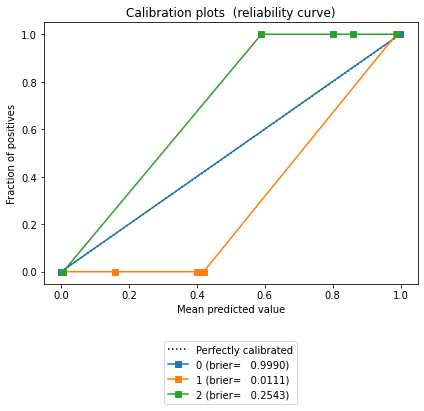

The Brier score metric may be used to assess how well a classifier is calibrated. For more info, please visit https://en.wikipedia.org/wiki/Brier_score

Check,Reason
Trust Score Comparison,"DeepchecksValueError: Number of samples in test dataset have not passed the minimum. you can change minimum samples needed to run with parameter ""min_test_samples"""
Index Train Test Leakage,DeepchecksValueError: Check IndexTrainTestLeakage requires dataset to have an index column
Date Train Test Leakage Duplicates,DeepchecksValueError: Check DateTrainTestLeakageDuplicates requires dataset to have a date column
Date Train Test Leakage Overlap,DeepchecksValueError: Check DateTrainTestLeakageOverlap requires dataset to have a date column
Boosting Overfit,DeepchecksValueError: Unsupported model of type: RandomForestClassifier
Trust Score Comparison,"DeepchecksValueError: Number of samples in test dataset have not passed the minimum. you can change minimum samples needed to run with parameter ""min_test_samples"""
Category Mismatch Train Test,Nothing found
String Mismatch Comparison,Nothing found
Label Ambiguity - Test Dataset,Nothing found
Label Ambiguity - Train Dataset,Nothing found


In [9]:
# set check_datasets_policy to 'both' so that for single dataset checks (e.g. some of the integrity checks),
# both test and train will be checked

# along with the training and test datasets we should supply a scikit-learn api model type
# if we want many of the checks to be able to run

OverallSuite.run(train_dataset=ds_train, test_dataset=ds_test, model=rf_clf, check_datasets_policy='both')

We can see that the single feature contribution failed, both for test and for train. Since this is a very simple dataset and this behavior is not necessarily problematic, we will remove the existing conditions for the PPS

In [10]:
# Lets have a look at all the checks and conditions so that we can edit them
OverallSuite

Overall Suite: [
	0: TrainTestDrift(max_num_categories=10, sort_feature_by=feature importance, n_top_columns=5)
		Conditions:
			0: PSI and Earth Mover's Distance cannot be greater than 0.2 and 0.1 respectively
	1: TrustScoreComparison(k_filter=10, alpha=0.001, max_number_categories=10, min_test_samples=300, sample_size=10000, random_state=42, n_to_show=5, percent_top_scores_to_hide=0.01)
		Conditions:
			0: Mean trust score decline is not greater than 20.00%
	2: IndexTrainTestLeakage(n_index_to_show=5)
		Conditions:
			0: Index leakage is not greater than 0%
	3: DateTrainTestLeakageDuplicates(n_to_show=5)
		Conditions:
			0: Date leakage ratio is not greater than 0%
	4: DateTrainTestLeakageOverlap
		Conditions:
			0: Date leakage ratio is not greater than 0%
	5: TrainTestSamplesMix
		Conditions:
			0: Percentage of test data samples that appear in train data not greater than 10.00%
	6: SingleFeatureContribution(n_show_top=5)
		Conditions:
			0: Features PPS is not greater than 0.8
	7:

In [11]:
# Lets have a look at the conditions we want to change:
OverallSuite[4]

DateTrainTestLeakageOverlap
	Conditions:
		0: Date leakage ratio is not greater than 0%

In [12]:
OverallSuite[4].remove_condition(0)

In [13]:
# print and see that the condition was removed
OverallSuite[4]

DateTrainTestLeakageOverlap

## Now lets rerun the suite with different train-val split:

In [14]:
train_len = round(0.67*iris_df.shape[0])
alternative_train_df = Dataset(iris_df[:train_len], label = label_col)
alternative_test_df = Dataset(iris_df[train_len:], label = label_col)
alt_rf_clf = RandomForestClassifier()
alt_rf_clf.fit(df_train.drop(label_col, axis=1), df_train[label_col]);

Overall Suite 
 The suite is composed of various checks such as: Train Test Drift, Trust Score Comparison, Index Train Test Leakage, etc... 
 Each check may contain conditions (which results in 
 ✓ /
 ✖ /
 ! 
 ), as well as other outputs such as plots or tables. 
 Suites, checks and conditions can all be modified (see tutorial [link]). 
 Conditions Summary

Status,Check,Condition,More Info
✖,Train Test Drift,PSI and Earth Mover's Distance cannot be greater than 0.2 and 0.1 respectively,"Found numeric columns with Earth Mover's Distance over 0.1: sepal length (cm), petal length (cm), petal width (cm)"
✖,Data Duplicates - Test Dataset,Duplicate data is not greater than 0%,Found 2.00% duplicate data
✖,Single Value in Column - Test Dataset,Does not contain only a single value for all columns,Columns containing a single value: ['target']
✖,Train-Test Difference Overfit,Train-Test metrics degradation percentage is not greater than 0.2,"Found degraded metrics: {'Precision': '100%', 'Recall': '100%'}"
✖,New Label Train Test,Number of new label values is not greater than 0,Found 1 new labels: [2]
✖,Single Feature Contribution - Train Dataset,Features PPS is not greater than 0.8,"Features with greater PPS: petal length (cm), petal width (cm)"
✖,Single Feature Contribution Train-Test,Train-Test features PPS difference is not greater than 0.2,"Features with PPS difference above threshold: petal length (cm), petal width (cm), sepal length (cm), sepal width (cm)"
✓,Single Feature Contribution - Test Dataset,Features PPS is not greater than 0.8,
✓,Category Mismatch Train Test,Number of new category values is not greater than 0 for all columns,
✓,String Mismatch Comparison,No new variants allowed in test data for all columns,


Additional Outputs

Train Test Drift

Calculate drift between train dataset and test dataset.

The Drift score is a measure for the difference between two distributions, in this check - the test
 and train distributions. The check shows the drift score and distributions for the features, sorted by
 feature importance and showing only the top 5 features, according to feature importance. 
 If available, the plot titles also show the feature importance (FI) rank.

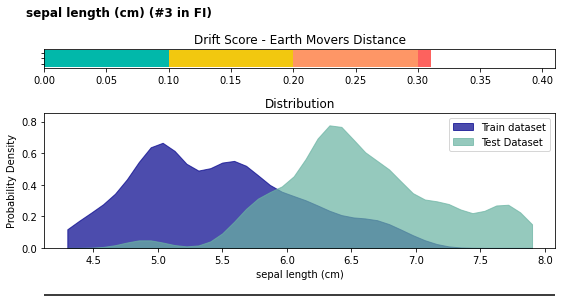

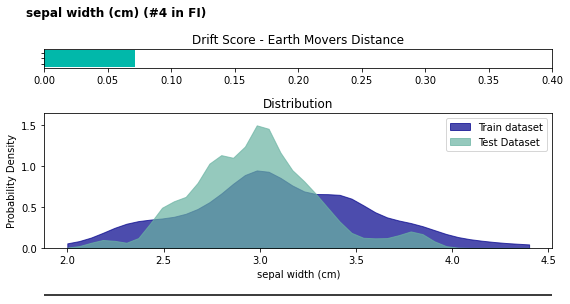

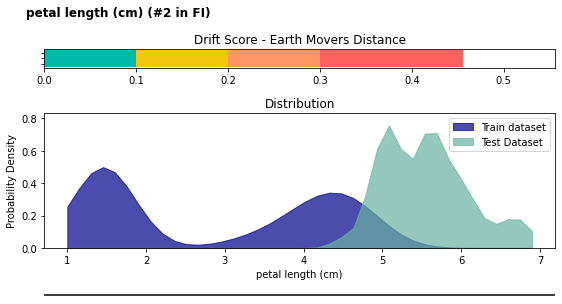

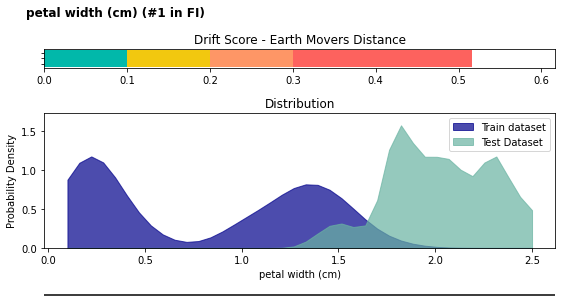

Single Feature Contribution - Train Dataset

Return the PPS (Predictive Power Score) of all features in relation to the label.

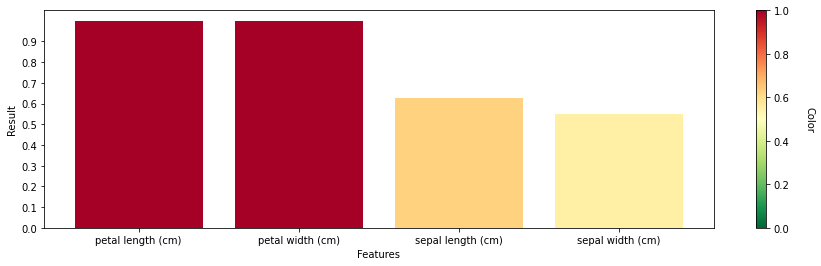

The PPS represents the ability of a feature to single-handedly predict another feature or label.

A high PPS (close to 1) can mean that this feature's success in predicting the label is actually due to data

leakage - meaning that the feature holds information that is based on the label to begin with.

Single Feature Contribution - Test Dataset

Return the PPS (Predictive Power Score) of all features in relation to the label.

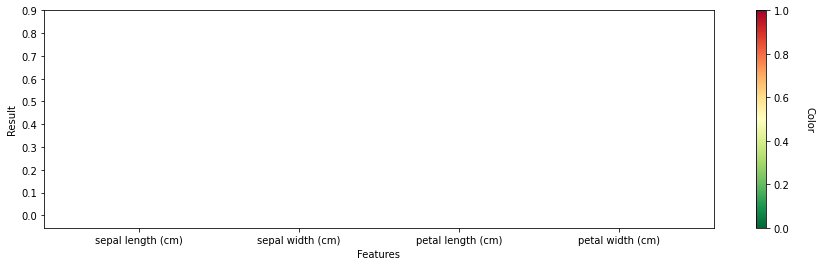

The PPS represents the ability of a feature to single-handedly predict another feature or label.

A high PPS (close to 1) can mean that this feature's success in predicting the label is actually due to data

leakage - meaning that the feature holds information that is based on the label to begin with.

Single Feature Contribution Train-Test

Return the difference in PPS (Predictive Power Score) of all features between train and test datasets.

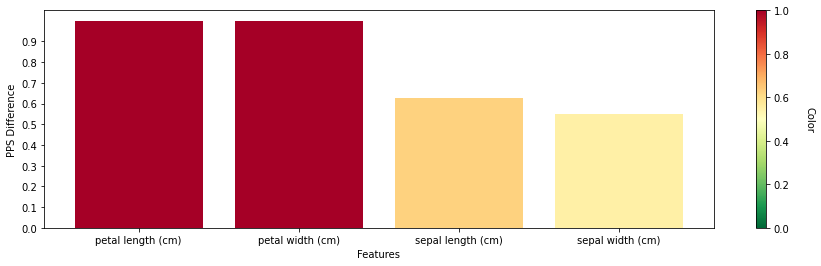

The PPS represents the ability of a feature to single-handedly predict another feature or label.

A high PPS (close to 1) can mean that this feature's success in predicting the label is actually due to data

leakage - meaning that the feature holds information that is based on the label to begin with.

When we compare train PPS to test PPS, A high difference can strongly indicate leakage, as a feature

that was powerful in train but not in test can be explained by leakage in train that is not relevant to a new dataset.

Train-Test Difference Overfit

Visualize overfit by displaying the difference between model metrics on train and on test data.

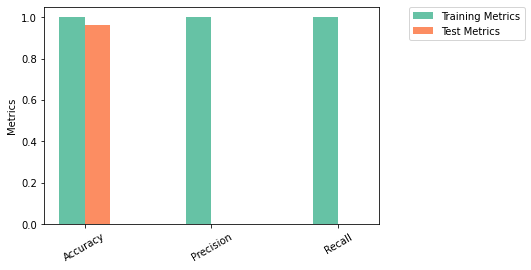

Unused Features

Detect features that are nearly unused by the model.

Features above the line are a sample of the most important features, while the features below the line are the unused features with highest variance, as defined by check parameters

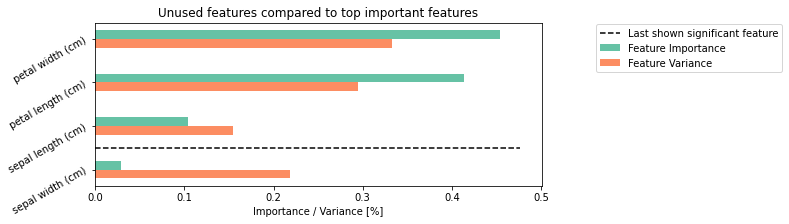

Performance Report - Train Dataset

Summarize given metrics on a dataset and model.

,Score
Metric,
Accuracy,1.00
Precision,1.00
Recall,1.00


Naive Model Comparison

Compare naive model score to given model score.

The given model performs 10 times compared to the naive model using the Accuracy metric. RandomForestClassifier model prediction has achieved a score of 0.96 compared to Naive statistical prediction which achieved a score of 0 on tested data.

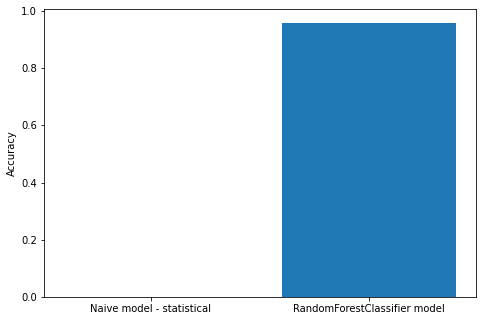

Confusion Matrix Report - Train Dataset

Calculate the confusion matrix of the model on the given dataset.

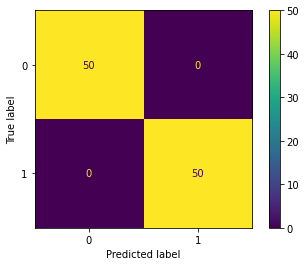

ROC Report - Train Dataset

Calculate the AUC (Area Under Curve) for each class.

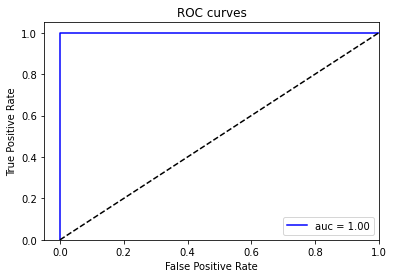

Calibration Metric - Train Dataset

Calculate the calibration curve with brier score for each class.

Calibration curves (also known as reliability diagrams) compare how well the probabilistic predictions of a binary classifier are calibrated. It plots the true frequency of the positive label against its predicted probability, for binned predictions.

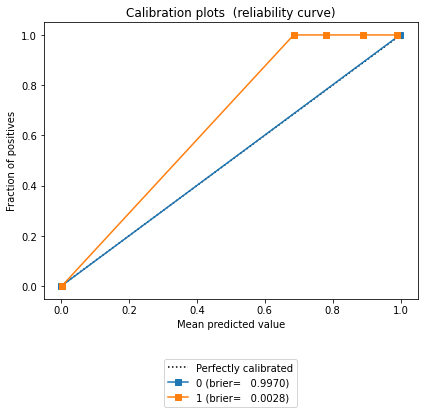

The Brier score metric may be used to assess how well a classifier is calibrated. For more info, please visit https://en.wikipedia.org/wiki/Brier_score

Single Value in Column - Test Dataset

Check if there are columns which have only a single unique value in all rows.

The following columns have only one unique value

,target
Single unique value,2


Data Duplicates - Test Dataset

Search for duplicate data in dataset.

2.00% of data samples are duplicates

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
Number of Duplicates,,,,,
2,5.80,2.70,5.10,1.90,2


Dominant Frequency Change

Check if dominant values have increased significantly between test and reference data.

,Value,Reference data %,Tested data %,Reference data #,Tested data #,P value
petal width (cm),0.20,29.00,0.00,29,0,0.00


New Label Train Test

Find new labels in test.

,Percent new labels in sample,New labels
Label column,,
target,100%,[2]


Check,Reason
Trust Score Comparison,"DeepchecksValueError: Classification labels must be a consecutive set from 0 to MAX_LABEL, found [2]."
Trust Score Comparison,"DeepchecksValueError: Classification labels must be a consecutive set from 0 to MAX_LABEL, found [2]."
Calibration Metric,"DeepchecksValueError: Classification labels must be a consecutive set from 0 to MAX_LABEL, found [2]."
Confusion Matrix Report,"DeepchecksValueError: Classification labels must be a consecutive set from 0 to MAX_LABEL, found [2]."
Performance Report,"DeepchecksValueError: Classification labels must be a consecutive set from 0 to MAX_LABEL, found [2]."
Roc Report,"DeepchecksValueError: Classification labels must be a consecutive set from 0 to MAX_LABEL, found [2]."
Date Train Test Leakage Overlap,DeepchecksValueError: Check DateTrainTestLeakageOverlap requires dataset to have a date column
Date Train Test Leakage Duplicates,DeepchecksValueError: Check DateTrainTestLeakageDuplicates requires dataset to have a date column
Index Train Test Leakage,DeepchecksValueError: Check IndexTrainTestLeakage requires dataset to have an index column
Boosting Overfit,DeepchecksValueError: Unsupported model of type: RandomForestClassifier


In [15]:
OverallSuite.run(train_dataset=alternative_train_df, test_dataset=alternative_test_df,
                             model=alt_rf_clf, check_datasets_policy='both')

##### Note that we found:
1. Test Dataset 'target' column, which is the label column, had only one single unique value! This indicates something that's worth noticing (test data is different than the training data and has only a single type of labels in samples...)
2. Test dataset had a duplicate sample (which might be fine, use-case dependent). If not relevant, this check can be removed from suite

## Create Custom CheckSuite

In [16]:
from deepchecks import CheckSuite
from deepchecks.checks import *

In [17]:
# check out which builtin performance checks exist
print([class_name for class_name in dir(performance) if class_name[0].isupper()])

['CalibrationMetric', 'ConfusionMatrixReport', 'NaiveModelComparison', 'PerformanceReport', 'RocReport', 'SegmentPerformance']


In [18]:
MyModelSuite = CheckSuite('Simple Suite For Model Performance',
    ModelInfo(),
    PerformanceReport(),
    TrainTestDifferenceOverfit(),
    ConfusionMatrixReport(),
    NaiveModelComparison(naive_model_type='statistical').add_condition_ratio_not_less_than(0.9)
)

Simple Suite For Model Performance 
 The suite is composed of various checks such as: Model Info, Performance Report, Train Test Difference Overfit, etc... 
 Each check may contain conditions (which results in 
 ✓ /
 ✖ /
 ! 
 ), as well as other outputs such as plots or tables. 
 Suites, checks and conditions can all be modified (see tutorial [link]). 
 Conditions Summary

Status,Check,Condition,More Info
✓,Naive Model Comparison,Ratio not less than 0.9 between the given model's result and the naive model's result,


Additional Outputs

Model Info

Summarize given model parameters.

Model Type: RandomForestClassifier

Parameter,Value,Default
bootstrap,True,True
ccp_alpha,0.00,0.00
class_weight,None,None
criterion,gini,gini
max_depth,None,None
max_features,auto,auto
max_leaf_nodes,None,None
max_samples,None,None
min_impurity_decrease,0.00,0.00
min_samples_leaf,1,1


Colored rows are parameters with non-default values

Performance Report - Train Dataset

Summarize given metrics on a dataset and model.

,Score
Metric,
Accuracy,1.00
Precision - Macro Average,1.00
Recall - Macro Average,1.00


Performance Report - Test Dataset

Summarize given metrics on a dataset and model.

,Score
Metric,
Accuracy,1.00
Precision - Macro Average,1.00
Recall - Macro Average,1.00


Train-Test Difference Overfit

Visualize overfit by displaying the difference between model metrics on train and on test data.

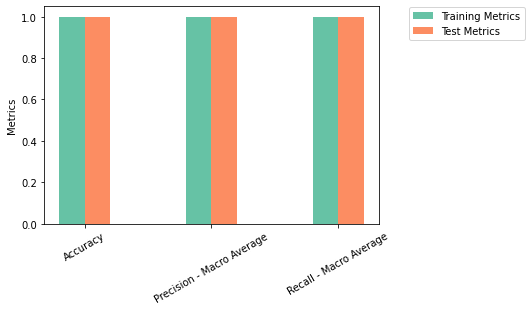

Confusion Matrix Report - Train Dataset

Calculate the confusion matrix of the model on the given dataset.

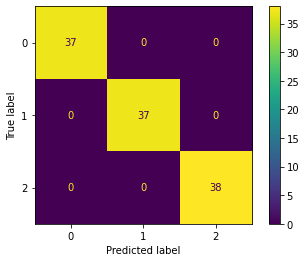

Confusion Matrix Report - Test Dataset

Calculate the confusion matrix of the model on the given dataset.

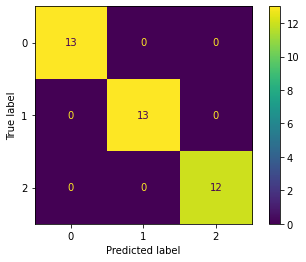

Naive Model Comparison

Compare naive model score to given model score.

The given model performs 2.92 times compared to the naive model using the Accuracy metric. RandomForestClassifier model prediction has achieved a score of 1 compared to Naive statistical prediction which achieved a score of 0.34 on tested data.

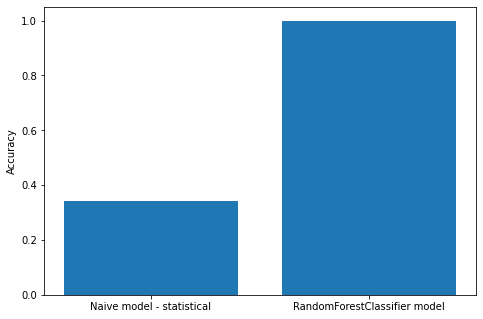

In [19]:
MyModelSuite.run(model=rf_clf, train_dataset=ds_train, test_dataset=ds_test, check_datasets_policy='both')